In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y = train['label'].values
X = train.drop('label', axis = 1).values

X = X / 255.0
test = test / 255.0

test = test.values

In [4]:
X = X.reshape(-1, 28, 28, 1)
test = test.reshape(-1, 28, 28, 1)

In [5]:
X.shape

(42000, 28, 28, 1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
model = Sequential([
    
    layers.Conv2D(32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
    layers.MaxPool2D(pool_size = 2, strides = 2),
    layers.BatchNormalization(),
    
    layers.Conv2D(64, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPool2D(pool_size = 2, strides = 2),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    layers.Dense(20, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax'),
])

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    rotation_range = 5
)

train_new = gen.flow(X_train, y_train, batch_size=32)
valid_new = gen.flow(X_valid, y_valid, batch_size=32)

In [9]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [10]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.2,
    patience = 2,
    min_lr = 0.00001
)

In [11]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                               patience = 3,
                               restore_best_weights = True,
                               min_delta = 0.0005,
                               verbose = 1
)

In [12]:
history = model.fit(
    train_new,
    validation_data=valid_new,
    epochs = 30
)

Epoch 1/30
1182/1182 [==============================] - 37s 29ms/step - loss: 0.2662 - accuracy: 0.9313 - val_loss: 0.3189 - val_accuracy: 0.9543
Epoch 2/30
1182/1182 [==============================] - 35s 29ms/step - loss: 0.0966 - accuracy: 0.9716 - val_loss: 0.0974 - val_accuracy: 0.9700
Epoch 3/30
1182/1182 [==============================] - 35s 30ms/step - loss: 0.0760 - accuracy: 0.9769 - val_loss: 0.0772 - val_accuracy: 0.9740
Epoch 4/30
1182/1182 [==============================] - 35s 29ms/step - loss: 0.0662 - accuracy: 0.9797 - val_loss: 0.0880 - val_accuracy: 0.9731
Epoch 5/30
1182/1182 [==============================] - 35s 29ms/step - loss: 0.0555 - accuracy: 0.9834 - val_loss: 0.0674 - val_accuracy: 0.9793
Epoch 6/30
1182/1182 [==============================] - 35s 29ms/step - loss: 0.0550 - accuracy: 0.9829 - val_loss: 0.0451 - val_accuracy: 0.9850
Epoch 7/30
1182/1182 [==============================] - 36s 30ms/step - loss: 0.0494 - accuracy: 0.9845 - val_loss: 0.0720 -

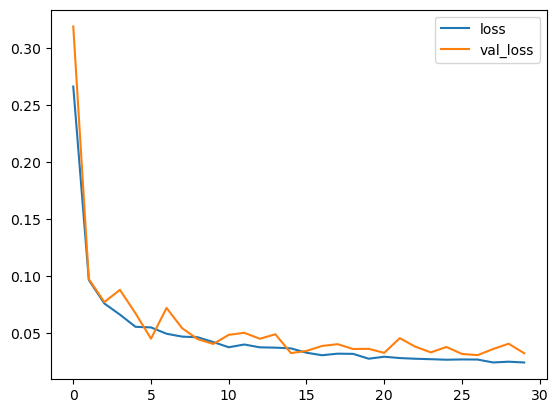

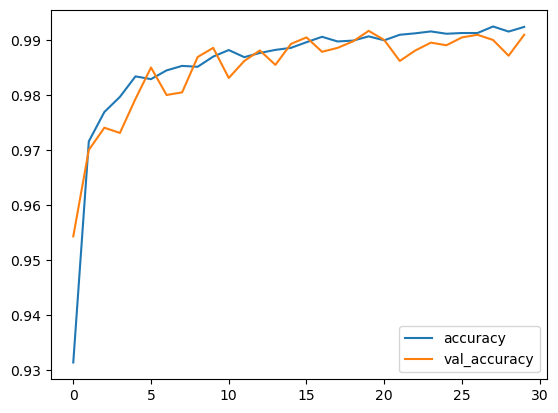

In [13]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [14]:
pred = model.predict(test)

pred = np.argmax(pred, axis=1)

875/875 [==============================] - 7s 7ms/step


In [15]:
submissions = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
submissions['Label'] = pred
submissions.to_csv('submission.csv', index=False)
submissions.head()


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [16]:
len(submissions)

28000